# **<font size=4 color=#BB3D00 face=微软雅黑>在数据中查找峰值</font>**

## **<font size=3  face=微软雅黑>※Matlab案例</font>** 

网址：https://ww2.mathworks.cn/help/signal/ug/find-peaks-in-data.html     
描述：本案例包含1个示例。    
### - <font color=DarkOrChid size=3>示例：使用 findpeaks 求出一组数据中局部最大值的值和位置</font>

## **<font size=3 face=微软雅黑>※Python案例</font>**

针对以上案例，采用Python语言实现。

### - <font color=DarkOrChid size=3>示例：使用 findpeaks 求出一组数据中局部最大值的值和位置</font>

文件 spots_num.mat 包含从 1749 年到 2012 年每年观测到的太阳黑子的平均数量。这些数据可以从美国国家航空航天局获得。

求出最大值及其出现的年份。将它们与数据一起绘制出来。

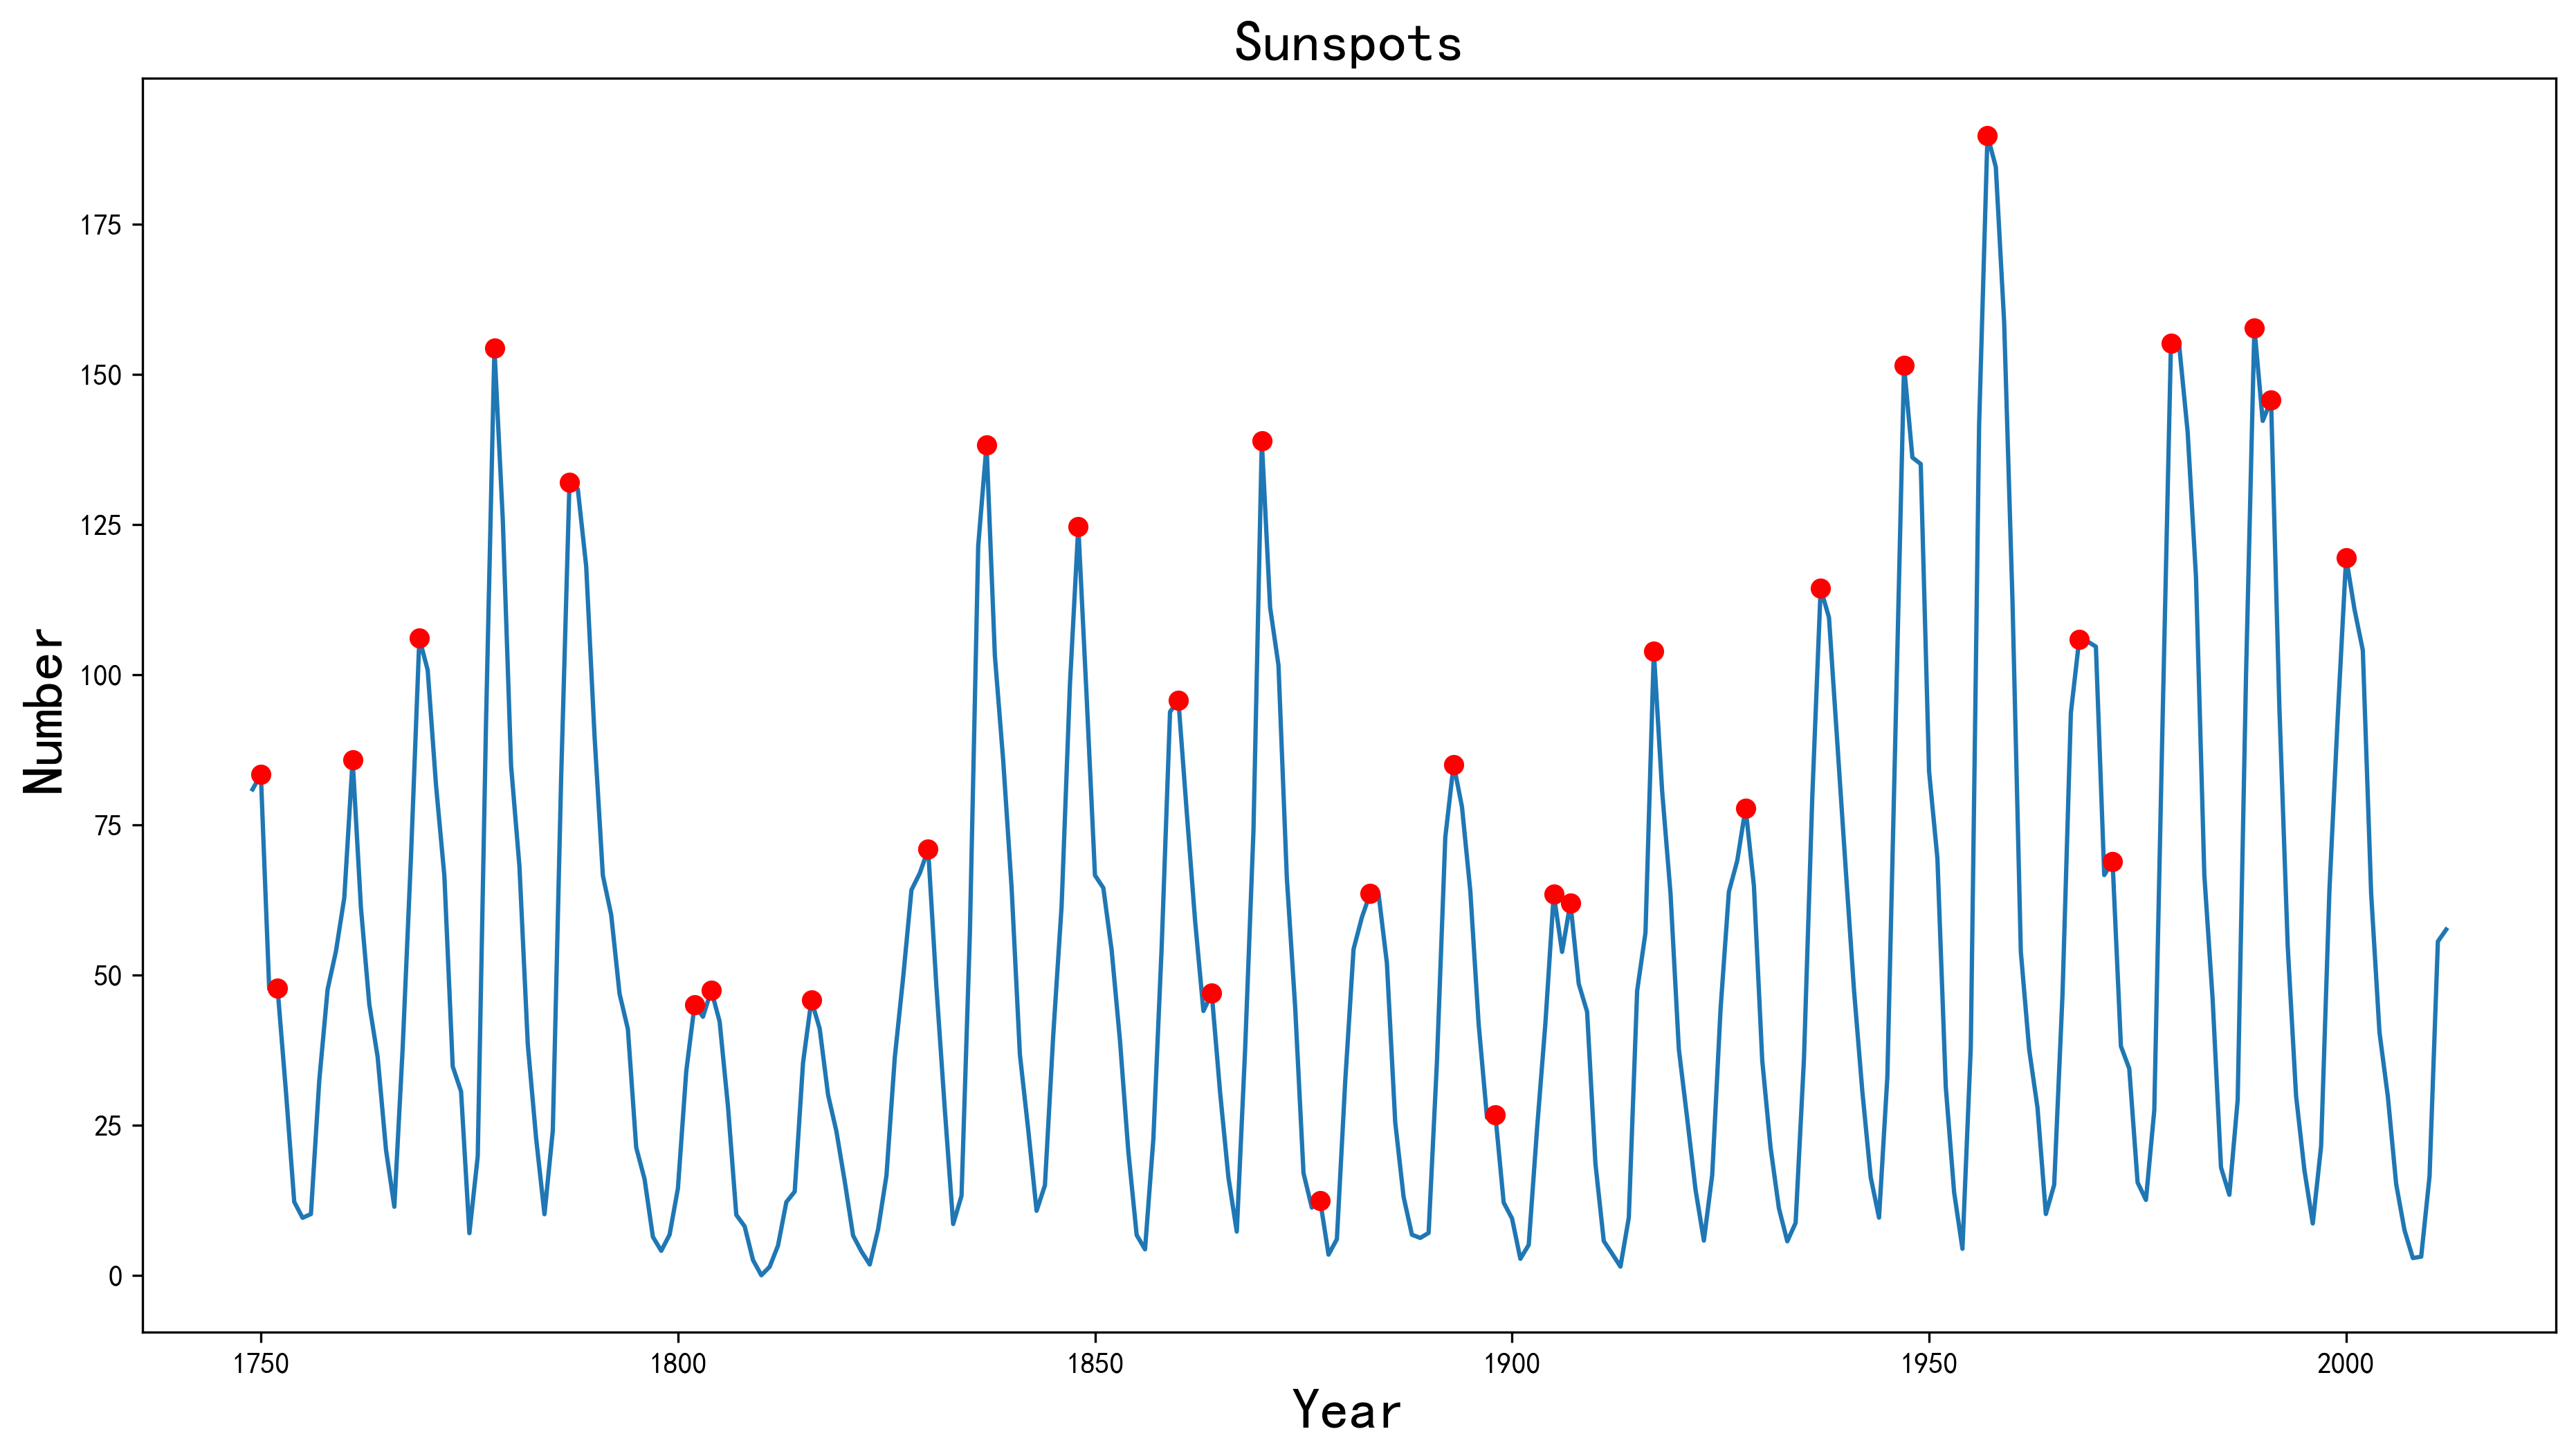

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib as mpl
from numpy import ndarray
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  #用来正常显示中文标签
#读入
data = sio.loadmat('spots_num.mat')
year = data['year']
avSpots = data['avSpots']
avSpots = avSpots.squeeze()
peaks,_ =find_peaks(avSpots)
plt.figure(figsize=(15,8),dpi=300)
plt.plot(year,avSpots)
plt.plot(year[peaks],avSpots[peaks],"or")
plt.xlabel('Year',fontsize=20)
plt.ylabel('Number',fontsize=20)
plt.title('Sunspots',fontsize=20)
plt.show()

一些峰值彼此非常接近。有些峰值不会周期性重复出现。每 50 年大约有五个这样的峰值。

为了更好地估计周期持续时间
再次使用 find_peaks，这次将峰间间隔限制为至少六年。
计算最大值之间的间隔均值。

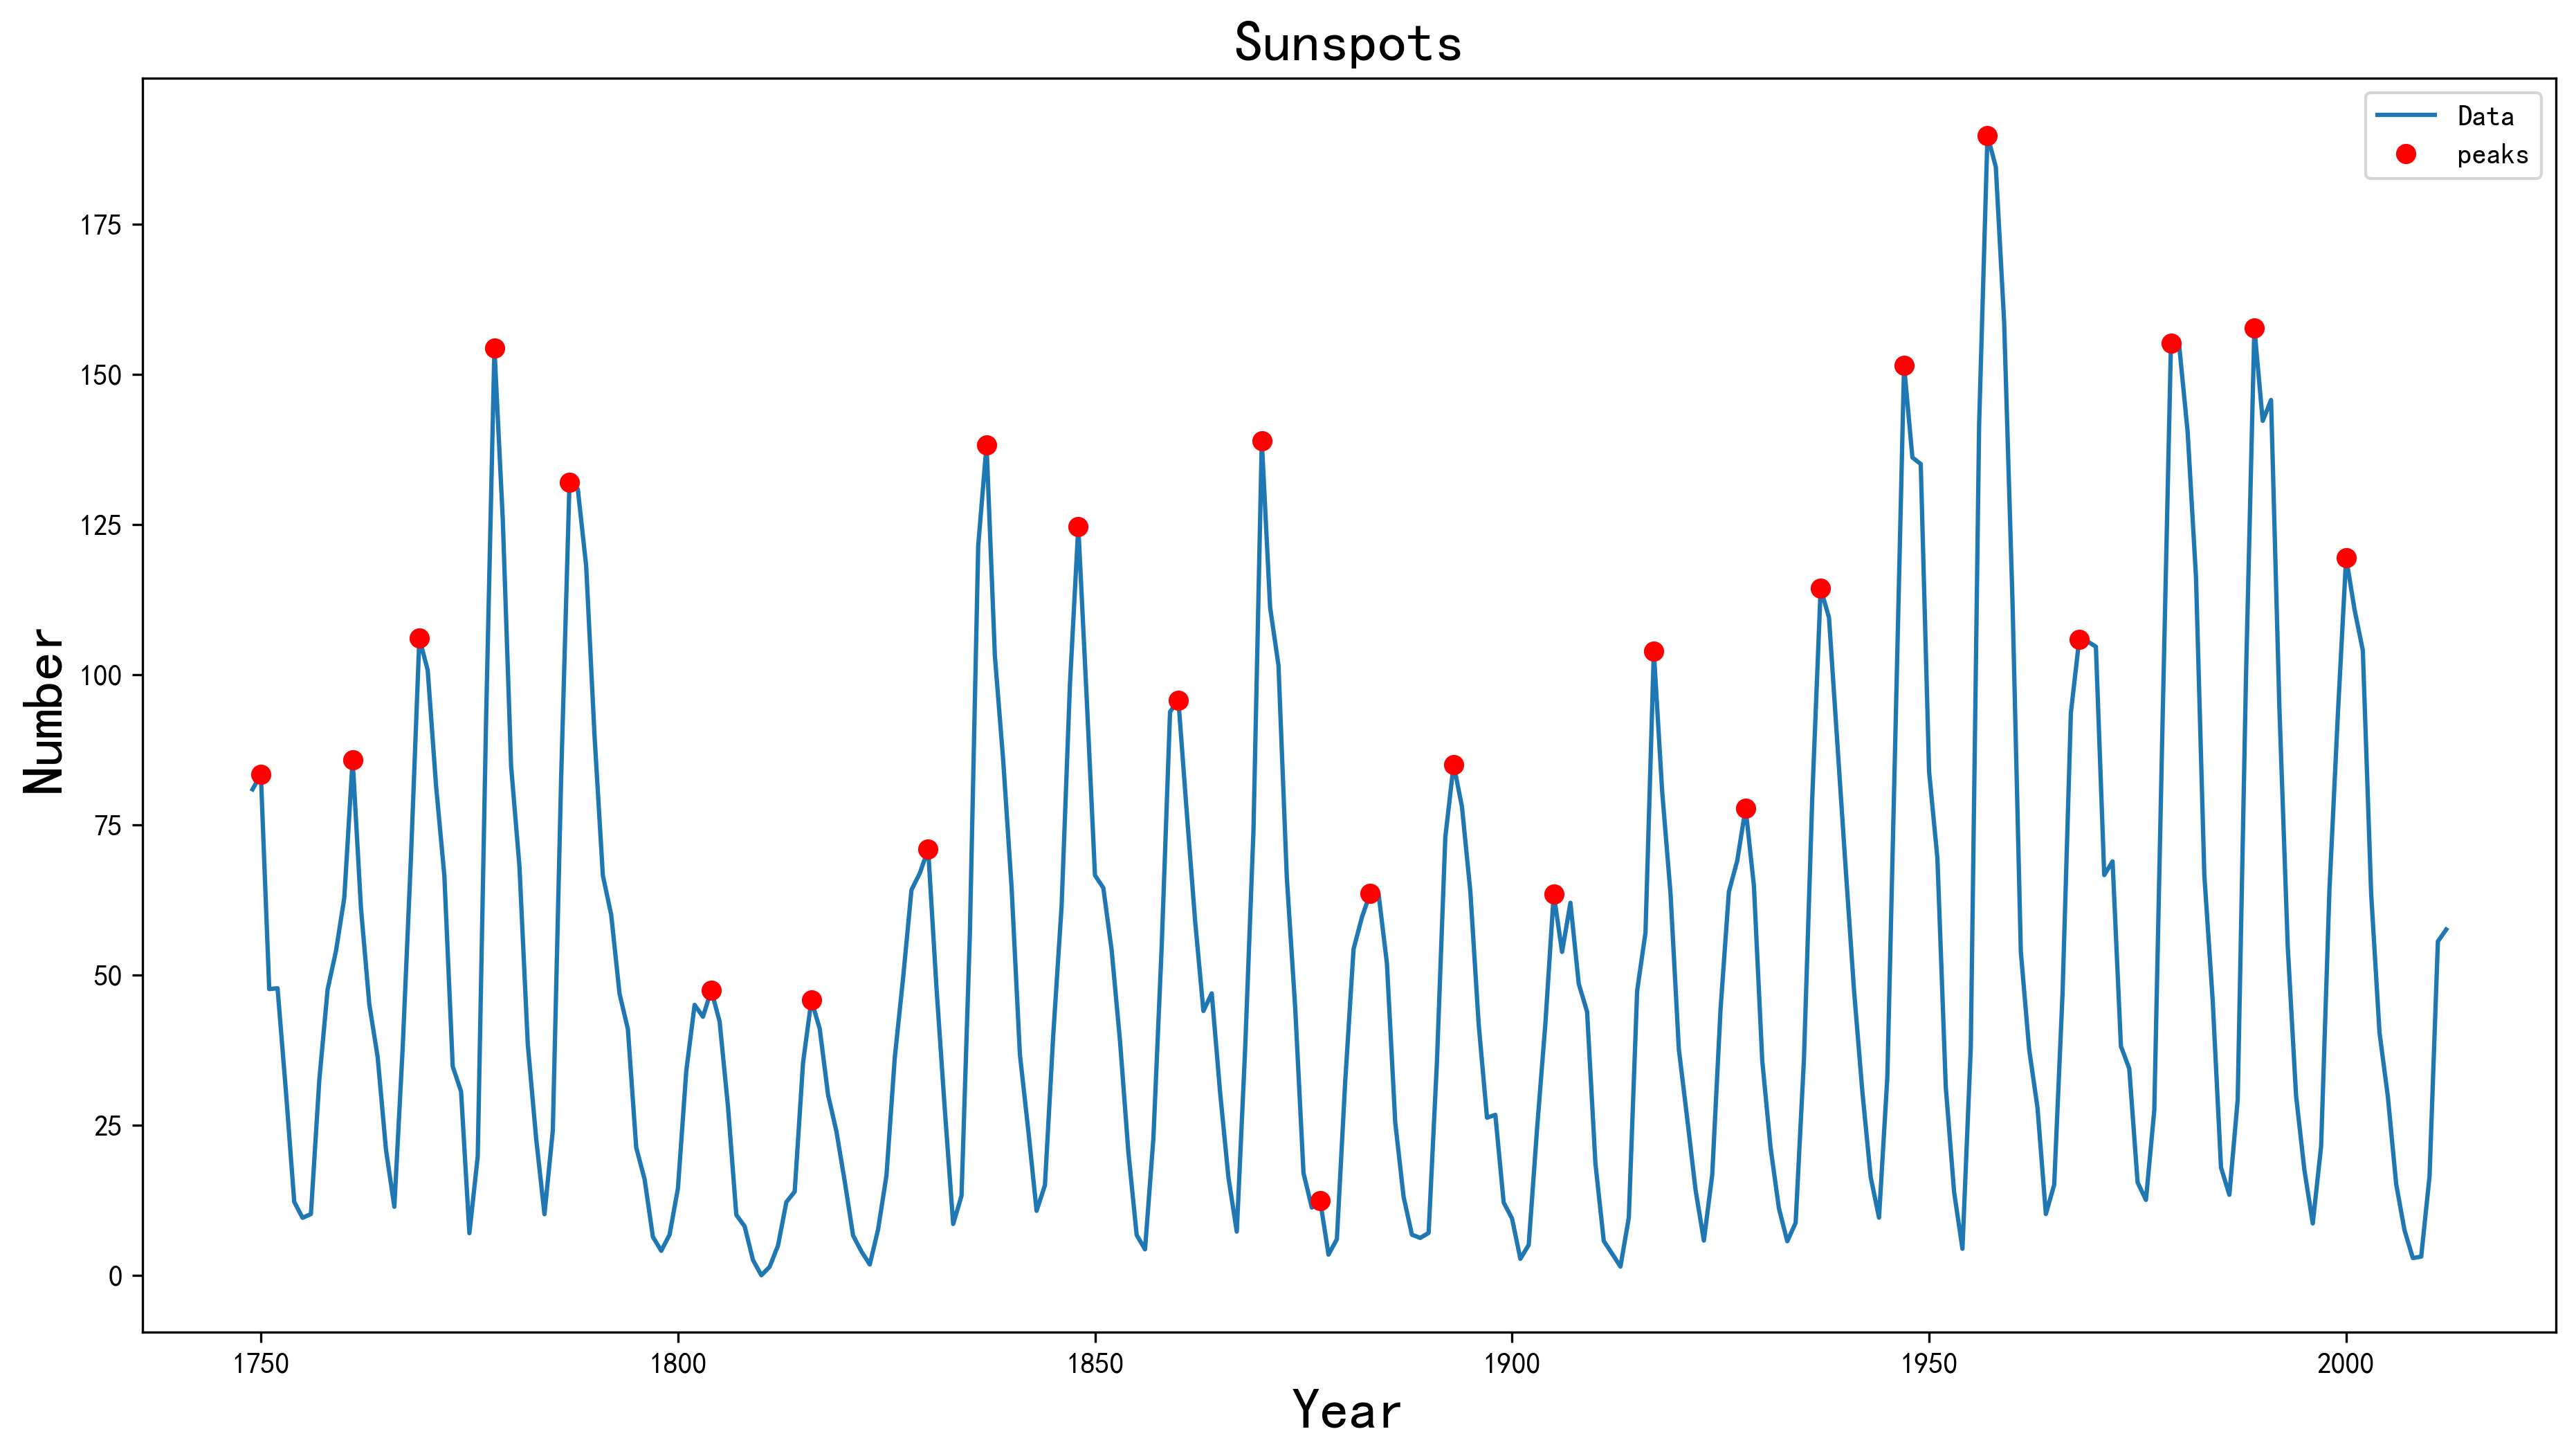

In [4]:
peaks,_ =find_peaks(avSpots,distance=6)
plt.figure(figsize=(15,8),dpi=300)
plt.plot(year,avSpots)
plt.plot(year[peaks],avSpots[peaks],"or")
plt.xlabel('Year',fontsize=20)
plt.ylabel('Number',fontsize=20)
plt.title('Sunspots',fontsize=20)
plt.legend([r"Data",r"peaks"])
plt.show()

In [5]:
Cycles = np.diff(peaks)
Cycles = abs(Cycles)
meanCycle = np.mean(Cycles)
print(meanCycle)

10.416666666666666


太阳活动周期大约为 11 年。
峰值高度低于40的都不考虑

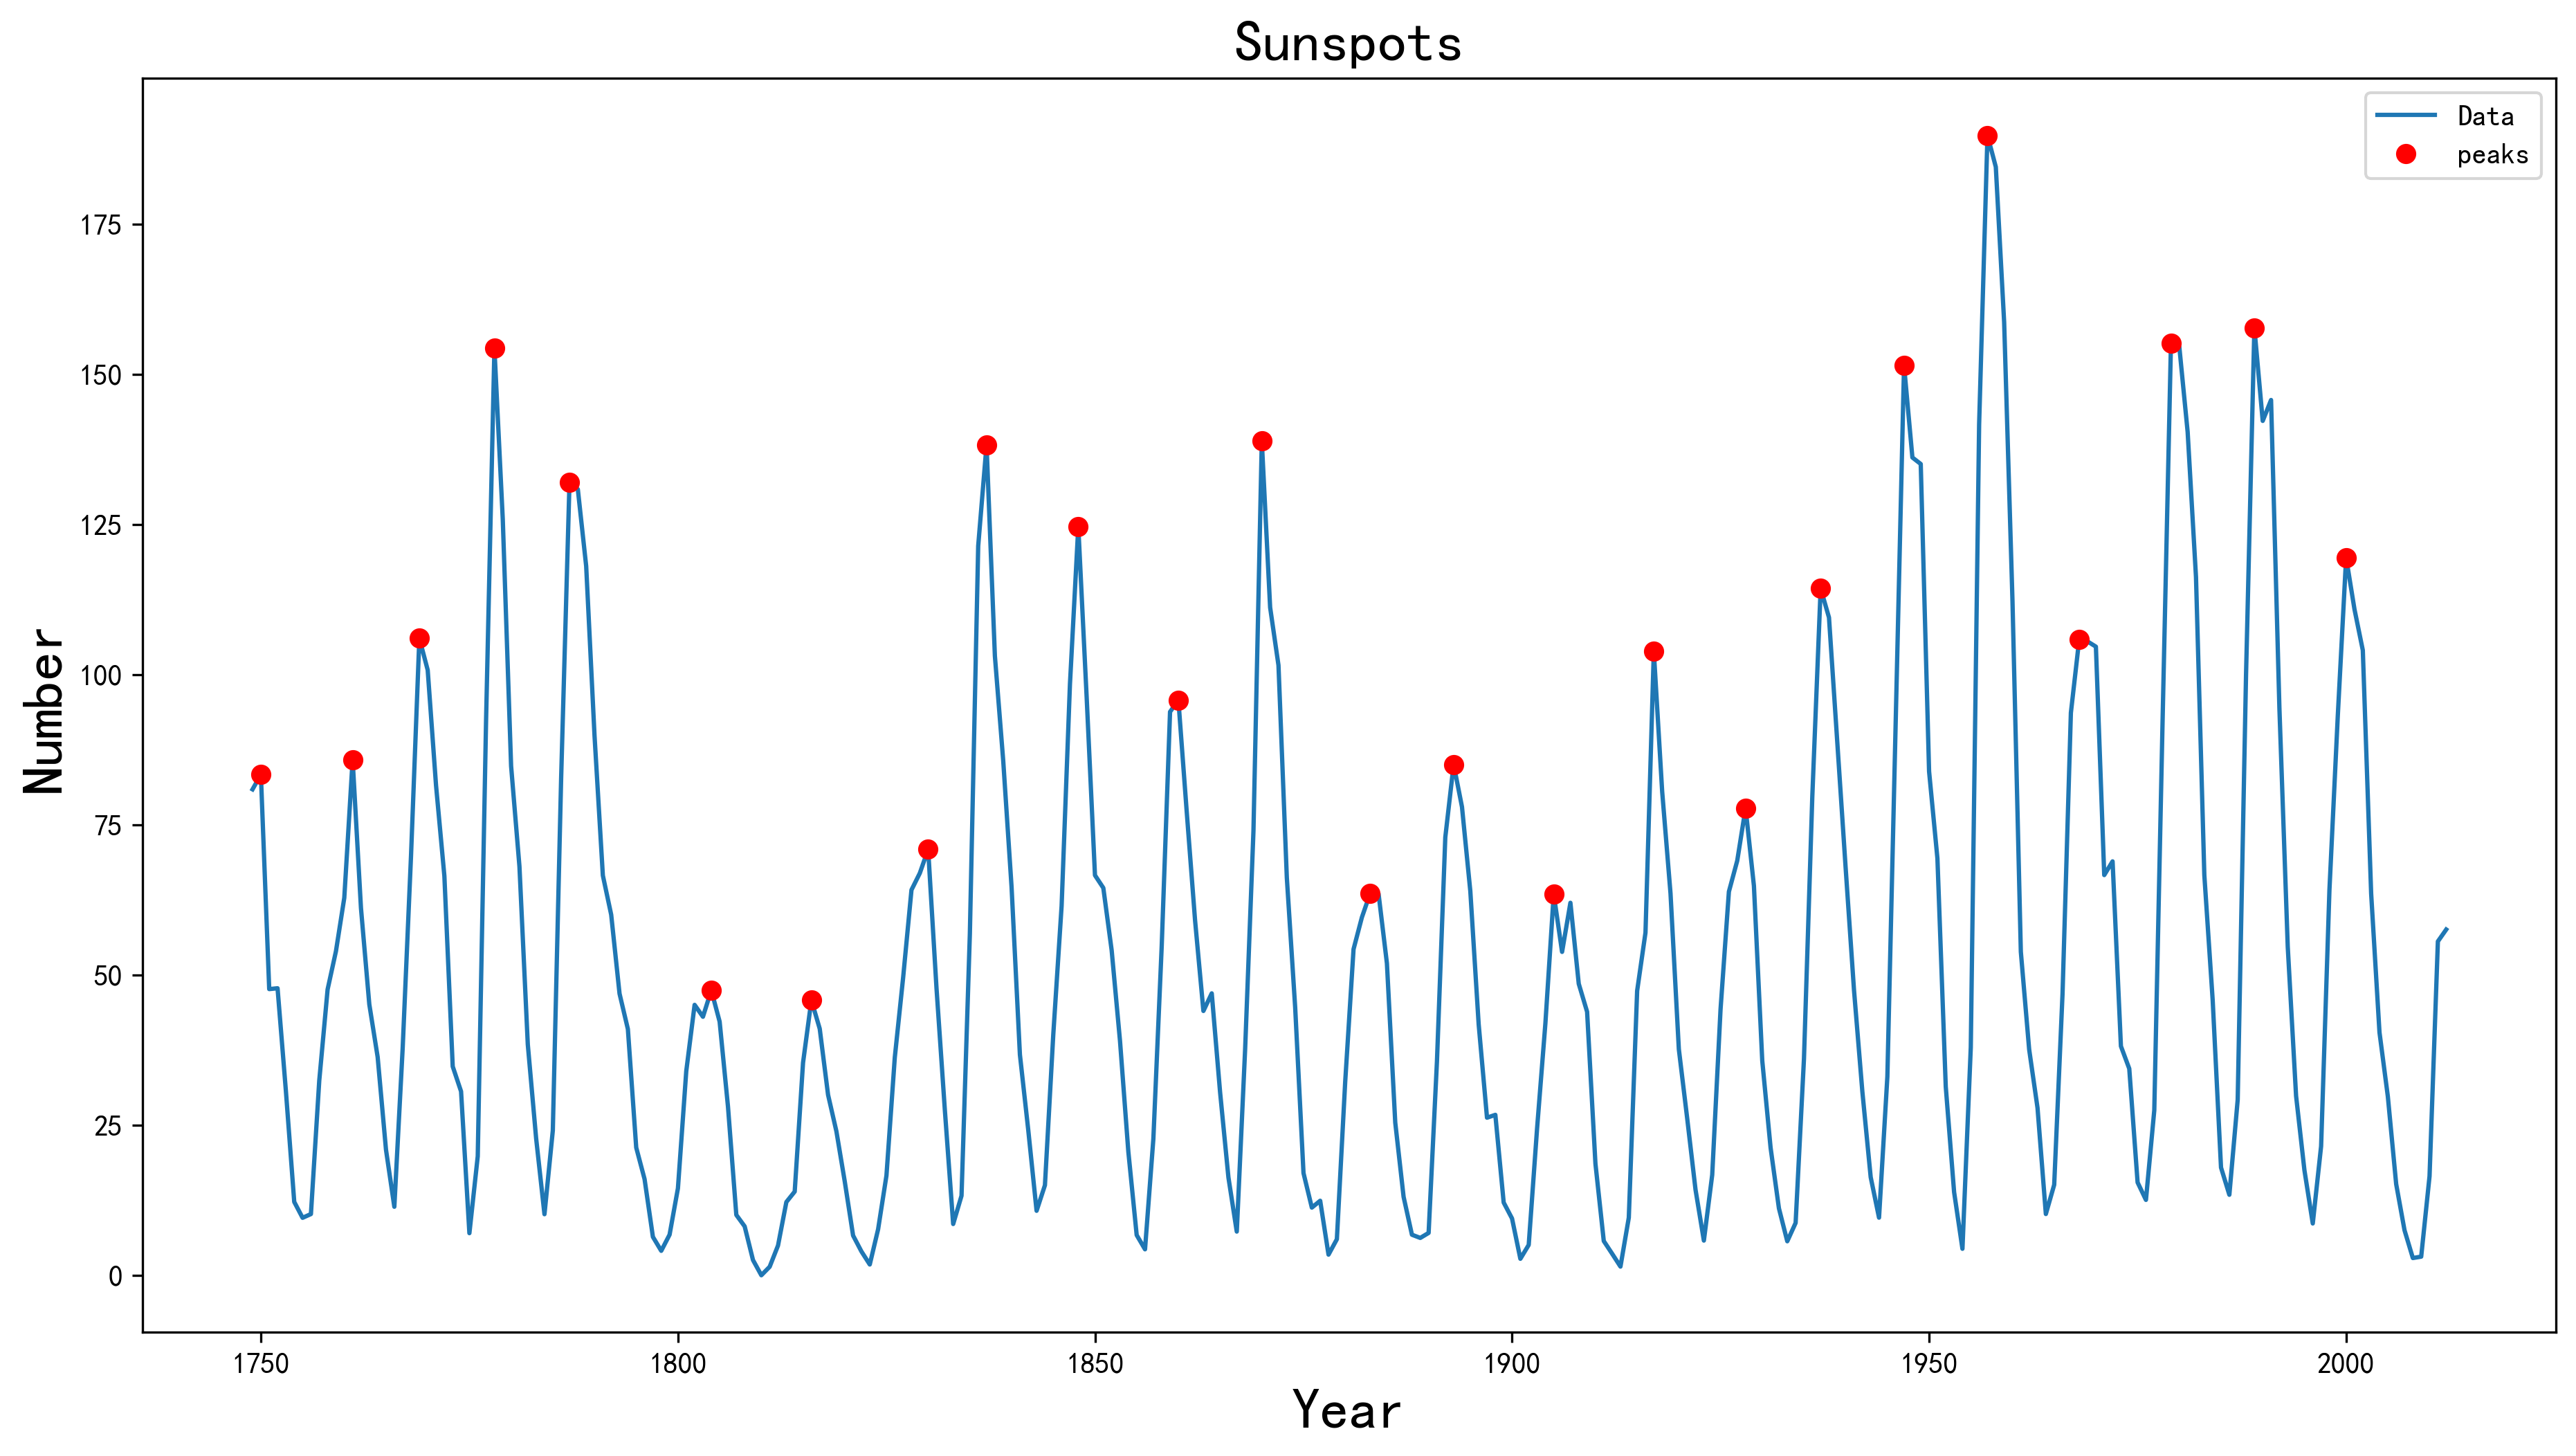

In [7]:
peaks,_ =find_peaks(avSpots,height=40,distance=6)
plt.figure(figsize=(15,8),dpi=300)
plt.plot(year,avSpots)
plt.plot(year[peaks],avSpots[peaks],"or")
plt.xlabel('Year',fontsize=20)
plt.ylabel('Number',fontsize=20)
plt.title('Sunspots',fontsize=20)
plt.legend([r"Data",r"peaks"])
plt.show()